<a href="https://colab.research.google.com/github/Keerthanabs1326/Prodigy/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1 : Implement a linear regression model to predict the prices of houses based on their square footage and the number if bedrooms and bathrooms

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [60]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
features = ['GrLivArea', 'BedroomAbvGr', 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']
target = 'SalePrice'

In [61]:
train_df = train_df.dropna(subset=features + [target])
test_df = test_df.dropna(subset=features)
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [63]:
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("Model Coefficients:")
print(coefficients)

Model Coefficients:
        Feature   Coefficient
0     GrLivArea    100.342268
1  BedroomAbvGr -24144.349231
2  BsmtFullBath  29197.454386
3  BsmtHalfBath  16348.540000
4      FullBath  34954.534653
5      HalfBath   5969.170365


In [64]:
if 'SalePrice' in test_df.columns:
    X_test = test_df['SalePrice']
    print("\nEvaluation Metrics:")
    print("Mean Squared Error:", mean_squared_error(X_test, y_pred))
    print("R² Score:", r2_score(X_test, y_pred))

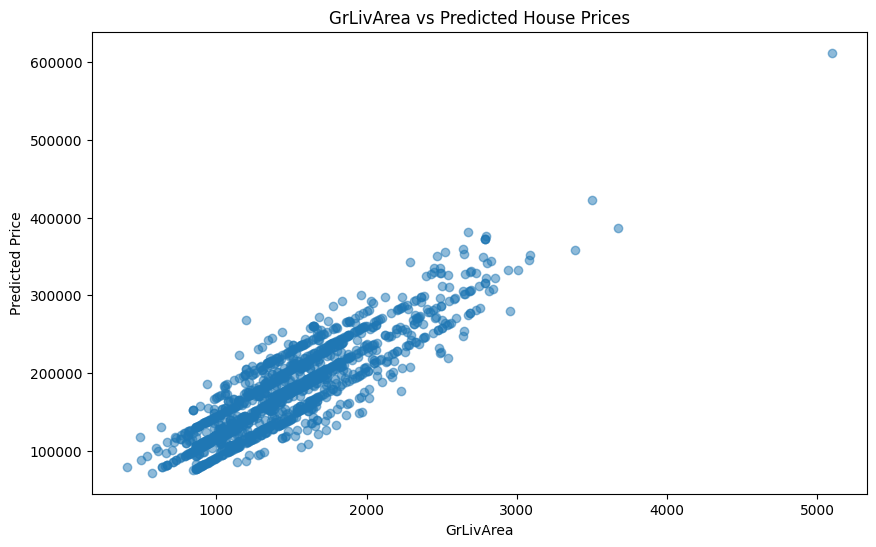

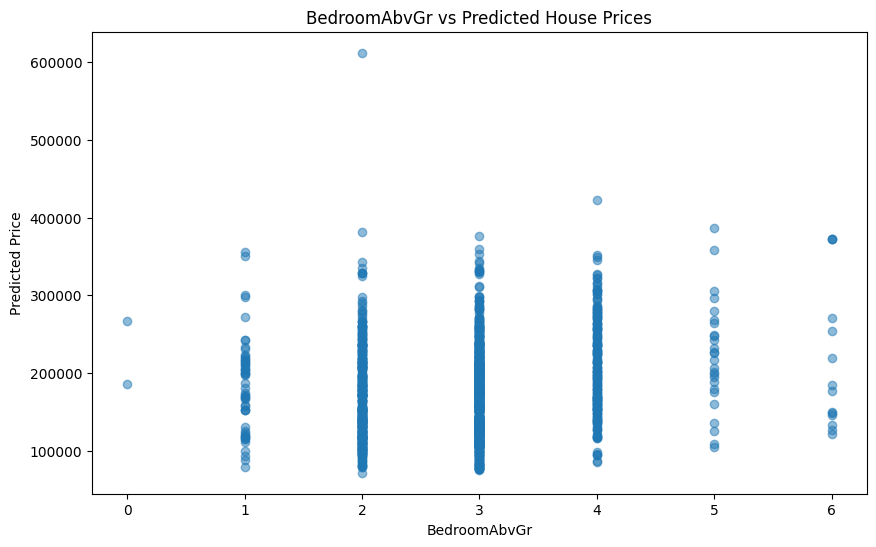

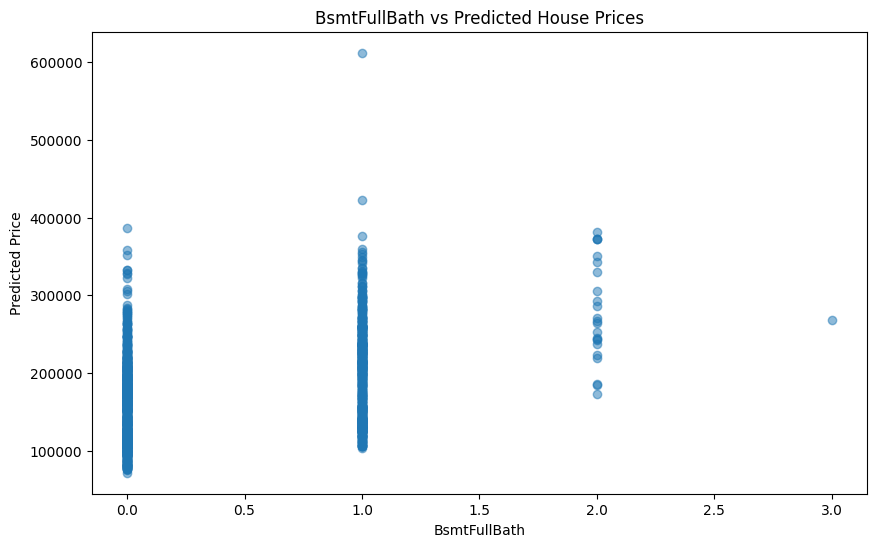

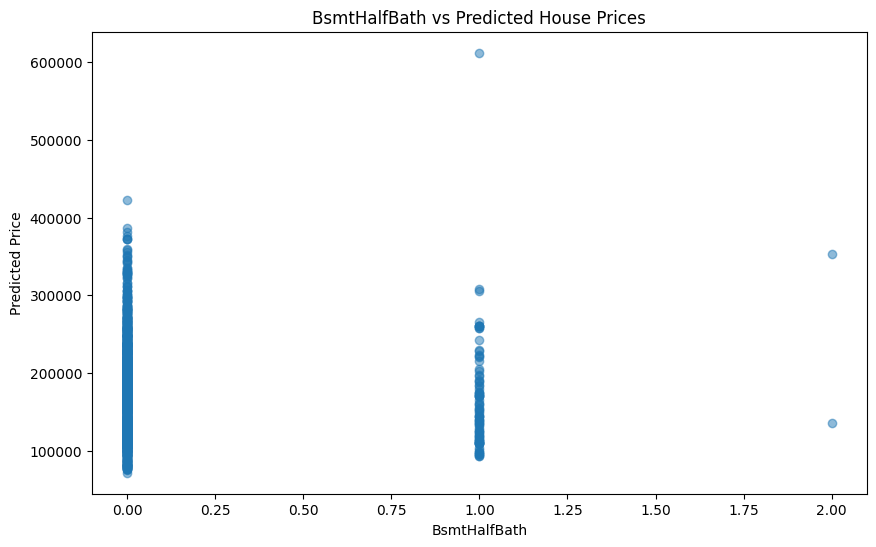

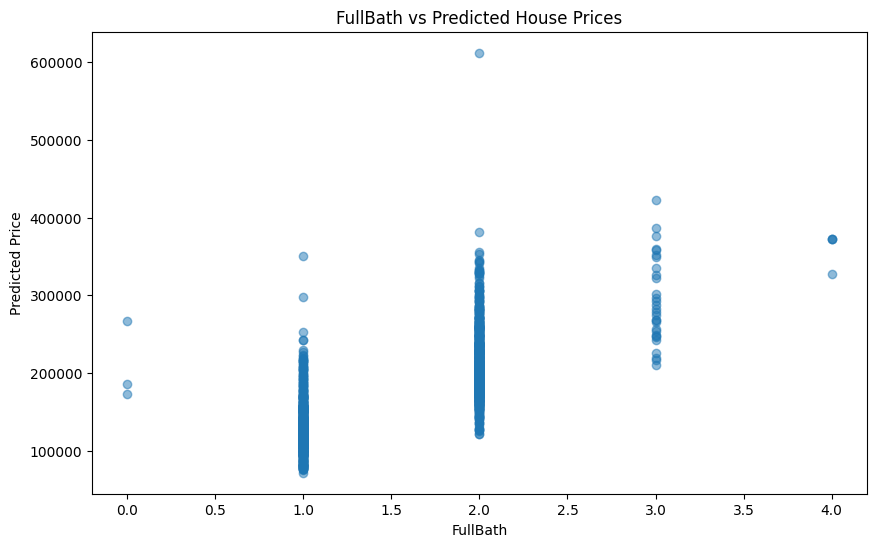

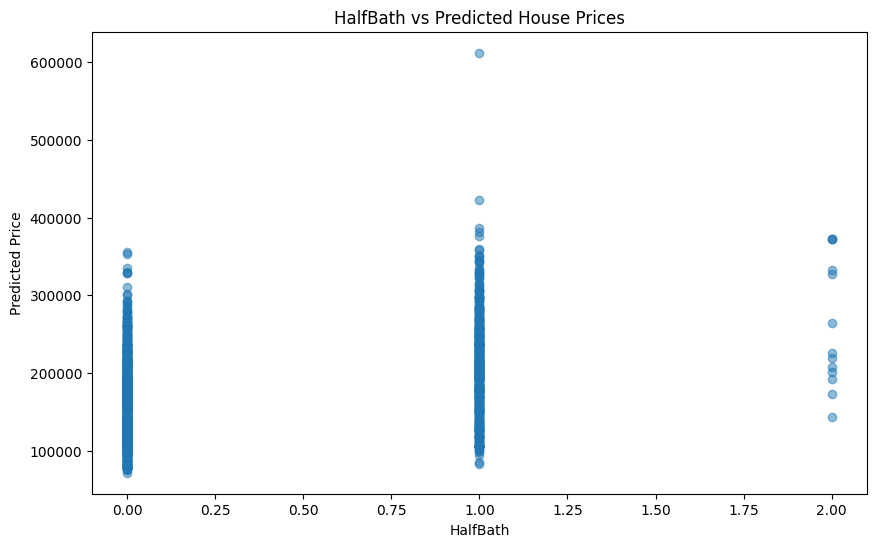

In [65]:
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[feature], y_pred, alpha=0.5,)
    plt.xlabel(feature)
    plt.ylabel("Predicted Price")
    plt.title(f"{feature} vs Predicted House Prices")
    plt.show()

In [41]:
test_df['predicted_price'] = y_pred
test_df.to_csv('test_with_predictions.csv', index=False)
print("\nPredictions saved to 'test_with_predictions.csv'")


Predictions saved to 'test_with_predictions.csv'
